# 웹서비스용 시각화 분석 시작 (district)

In [398]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family']='Malgun Gothic'  # Windows
import matplotlib.ticker as mticker
# plt.style.use("seaborn-pastel")
# plt.style.use("seaborn")
plt.style.use("fivethirtyeight")

In [ ]:
# df_jeju_casino = df_industry_jeju[
#     df_industry_jeju['업종명']=='기타 갬블링 및 베팅업'
# ]

# plt.figure(figsize=(10,5))
# plt.ticklabel_format(style='plain', useOffset=False, )
# plt.xticks(np.arange(2017, 2021, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))

ax = sns.barplot(x='연도', 
                 y='매장수대비이용금액', 
                 data=df_jeju_casino, 
                 palette='YlGn')
ax.set_title('제주시 연도별 갬블링 및 베팅업 매장수대비이용금액')

In [175]:
plt.rcParams['font.family'] = 'NanumGothic'

In [184]:
# %ls

## district 파일 불러오기

In [4]:
df = pd.read_csv('jupyter/district_final.csv')

In [187]:
df.head()

,Unnamed: 0,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
0,0,2017,강남구,350,3,115,407,51,48.9,55,66,6,48,561052,255025,16714,72511,679047,11074,56982
1,1,2017,강동구,194,6,65,185,15,50.8,22,50,3,28,440359,153054,16496,29952,146512,4885,15466
2,2,2017,강북구,271,0,88,291,22,47.8,13,76,15,33,328002,99742,21922,18928,71752,3681,10569
3,3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30,608255,220758,18695,36556,234394,5651,20057
4,4,2017,관악구,258,1,73,247,35,48.7,23,50,15,36,520929,146633,24530,26374,115390,5640,17322


## 지차체별 3년 음주 운전수 누적

In [354]:
df_alco=pd.pivot_table(data=df, 
               index='자치구', 
               values='음주운전사고수',
               aggfunc='sum').reset_index()

In [355]:
df_alco = df_alco.reindex(df_alco['음주운전사고수'].sort_values(ascending=False).index)

Text(0.5, 1.0, '지차체별 3년 음주 운전수 누적')

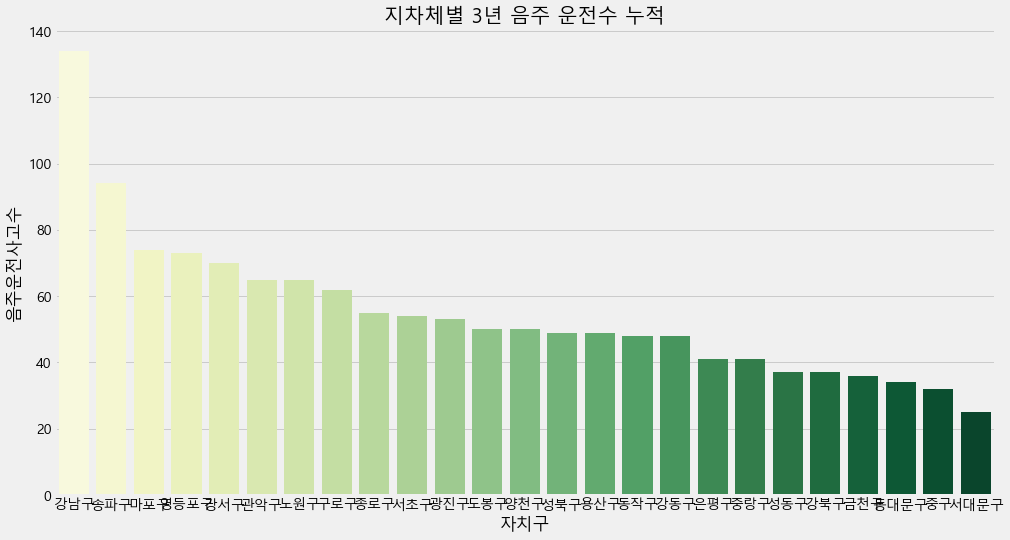

In [450]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x='자치구', 
                 y='음주운전사고수', 
                 data=df_alco, 
                 palette='YlGn')
ax.set_title('지차체별 3년 음주 운전수 누적')

In [358]:
df_ja=pd.pivot_table(data=df, 
               index='자치구', 
               values='사고수',
               aggfunc='sum').reset_index()

In [359]:
df_ja.head(1)

,자치구,사고수
0,강남구,1059


<AxesSubplot:xlabel='자치구', ylabel='사고수'>

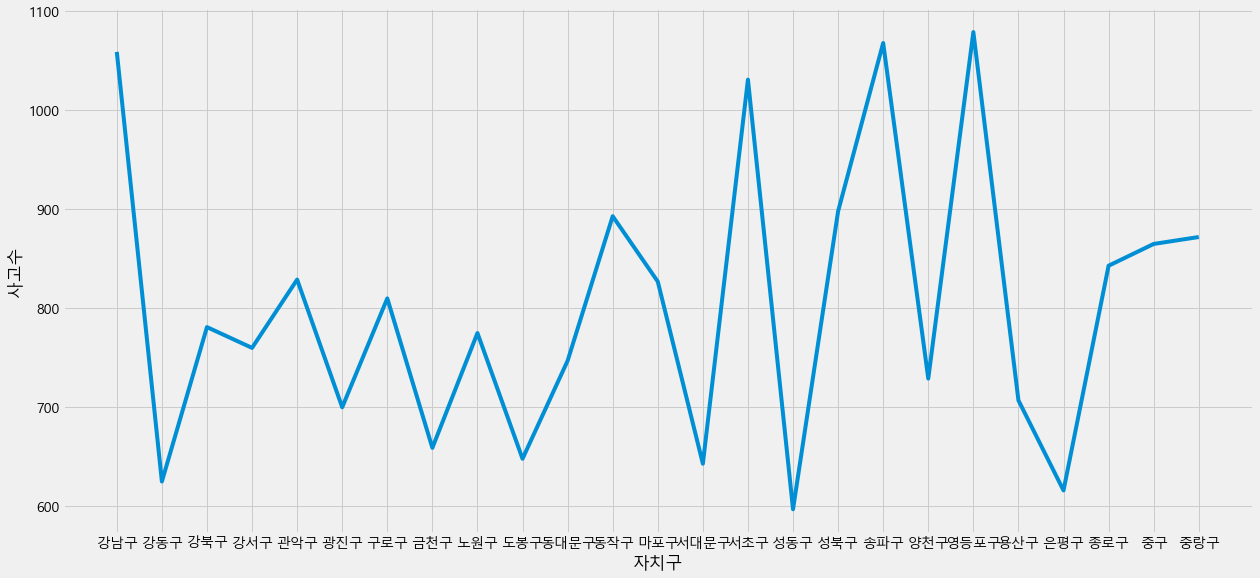

In [490]:
plt.figure(figsize=(19,9))
sns.lineplot(x='자치구', y='사고수', data=df_ja, ci=None)

In [374]:
df['년ㄷ']

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
0,2017,강남구,350,3,115,407,51,48.9,55,66,6,48,561052,255025,16714,72511,679047,11074,56982
1,2017,강동구,194,6,65,185,15,50.8,22,50,3,28,440359,153054,16496,29952,146512,4885,15466
2,2017,강북구,271,0,88,291,22,47.8,13,76,15,33,328002,99742,21922,18928,71752,3681,10569
3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30,608255,220758,18695,36556,234394,5651,20057
4,2017,관악구,258,1,73,247,35,48.7,23,50,15,36,520929,146633,24530,26374,115390,5640,17322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2019,용산구,235,0,56,255,12,49.8,14,47,10,41,245185,92666,16145,20254,135240,4594,18282
71,2019,은평구,199,1,73,191,26,52.5,16,49,5,38,484546,150700,20880,24681,93631,4331,12965
72,2019,종로구,275,2,91,278,51,50.3,16,66,12,53,161869,63321,13269,39679,260446,6709,26606
73,2019,중구,270,1,79,267,27,51.1,7,57,7,54,136488,66089,14353,60127,392568,6250,34751


In [369]:
df_sago = df_sago.reindex(df_sago['사고수'].sort_values(ascending=False).index)

## 지자체별 3년 사고수 누적

Text(0.5, 1.0, '지자체별 3년 사고수 누적')

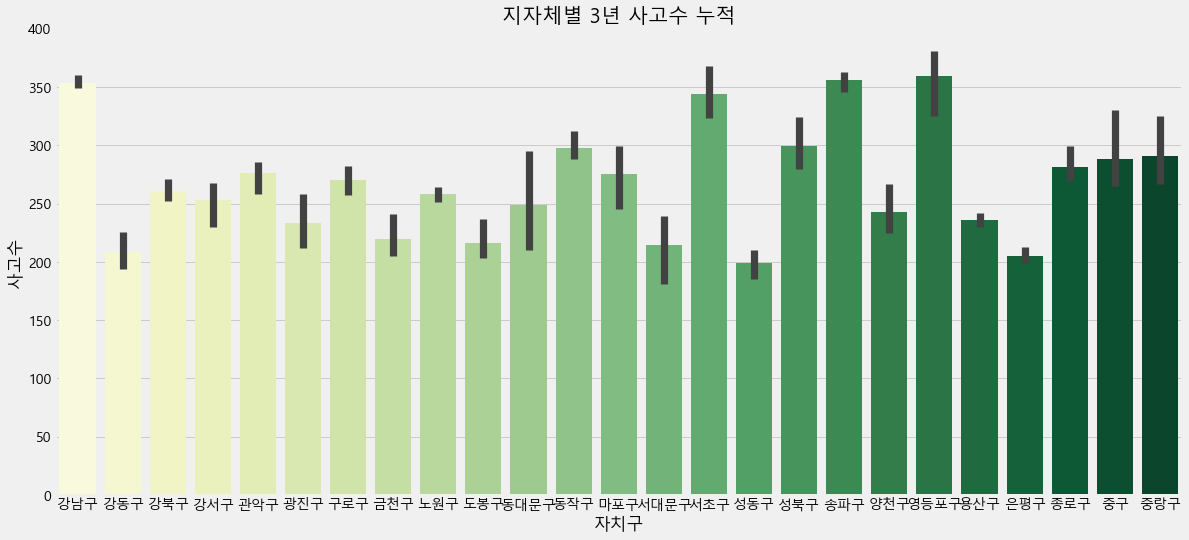

In [448]:
plt.figure(figsize=(18,8))

ax = sns.barplot(x='자치구', 
                 y='사고수', 
                 data=df, 
                 palette='YlGn')
ax.set_title('지자체별 3년 사고수 누적')

In [487]:
# In [1]: df = pd.DataFrame.from_dict([{'Country': 'A', 'Year':2012, 'Value': 20, 'Volume': 1}, {'Country': 'B', 'Year':2012, 'Value': 100, 'Volume': 2}, {'Country': 'C', 'Year':2013, 'Value': 40, 'Volume': 4}])

# In [2]: df_pivot = pd.pivot_table(df, index=['Country'], columns = ['Year'],values=['Value'], fill_value=0)

# In [3]: df_pivot
# Out [4]:
#     Value     
# Year     2012 2013
# Country           
# A          20    0
# B         100    0
# C           0   40

df_sago = df_sago.reindex(df_sago['사고수'].sort_values(ascending=False).index)



## 자치구별 분석

Text(0.5, 1.0, '3년 사고수 누적')

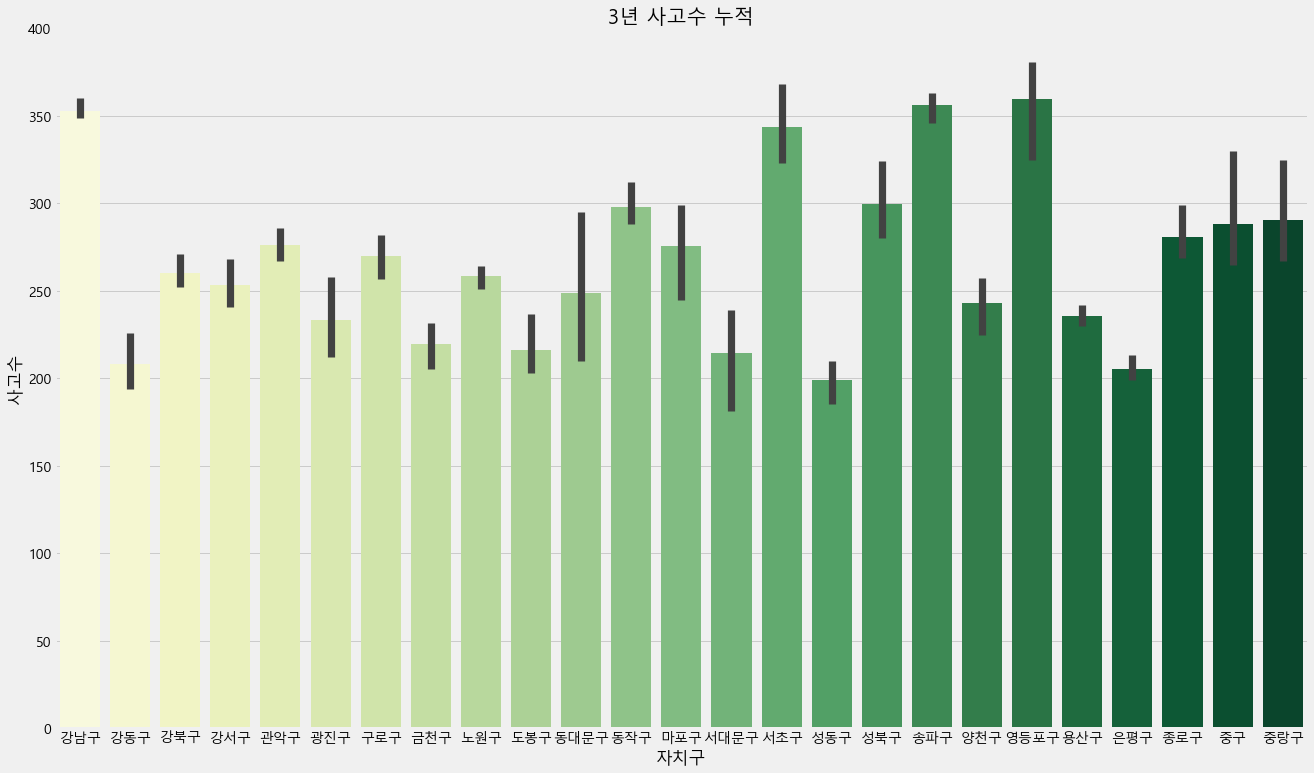

In [447]:
plt.figure(figsize=(20,12))

ax = sns.barplot(x='자치구', 
                 y='사고수', 
                 data=df, 
                 palette='YlGn')
ax.set_title('3년 사고수 누적')

In [445]:
df_sago=pd.pivot_table(data=df, 
               index='년도', 
               values='사고수',
               aggfunc='sum').reset_index()

## 3년 사고수 누적 

Text(0.5, 1.0, '3년 사고수 누적')

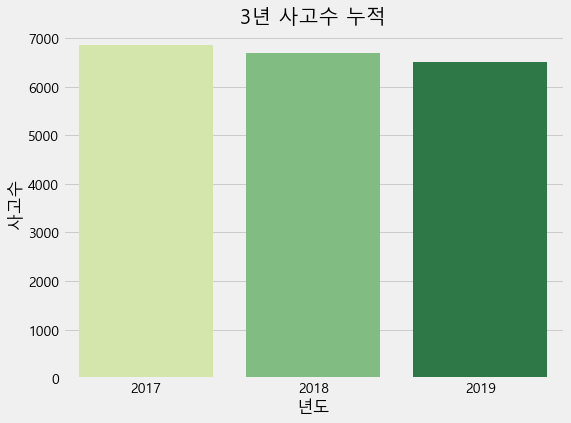

In [442]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='년도', 
                 y='사고수', 
                 data=df_sago, 
                 palette='YlGn')
ax.set_title('3년 사고수 누적')

<AxesSubplot:xlabel='년도', ylabel='사고수'>

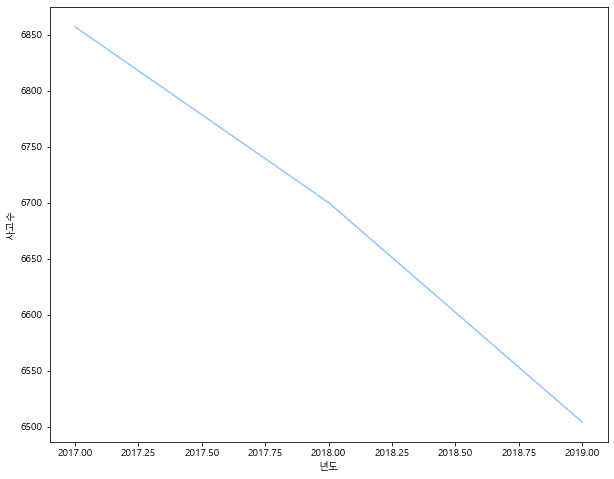

In [377]:
plt.figure(figsize=(10,8))
sns.lineplot(x='년도', y='사고수', data=df_sago, ci=None)

In [ ]:
# plt.figure(figsize=(12,5))
# sns.lineplot(x='연도', y='매장수', data=df_industry, hue='업종명 대분류')

## 상관관계 분석

In [13]:
df2=df.drop(columns='자치구')

<AxesSubplot:title={'center':'교통 상관관계를 알아보자'}>

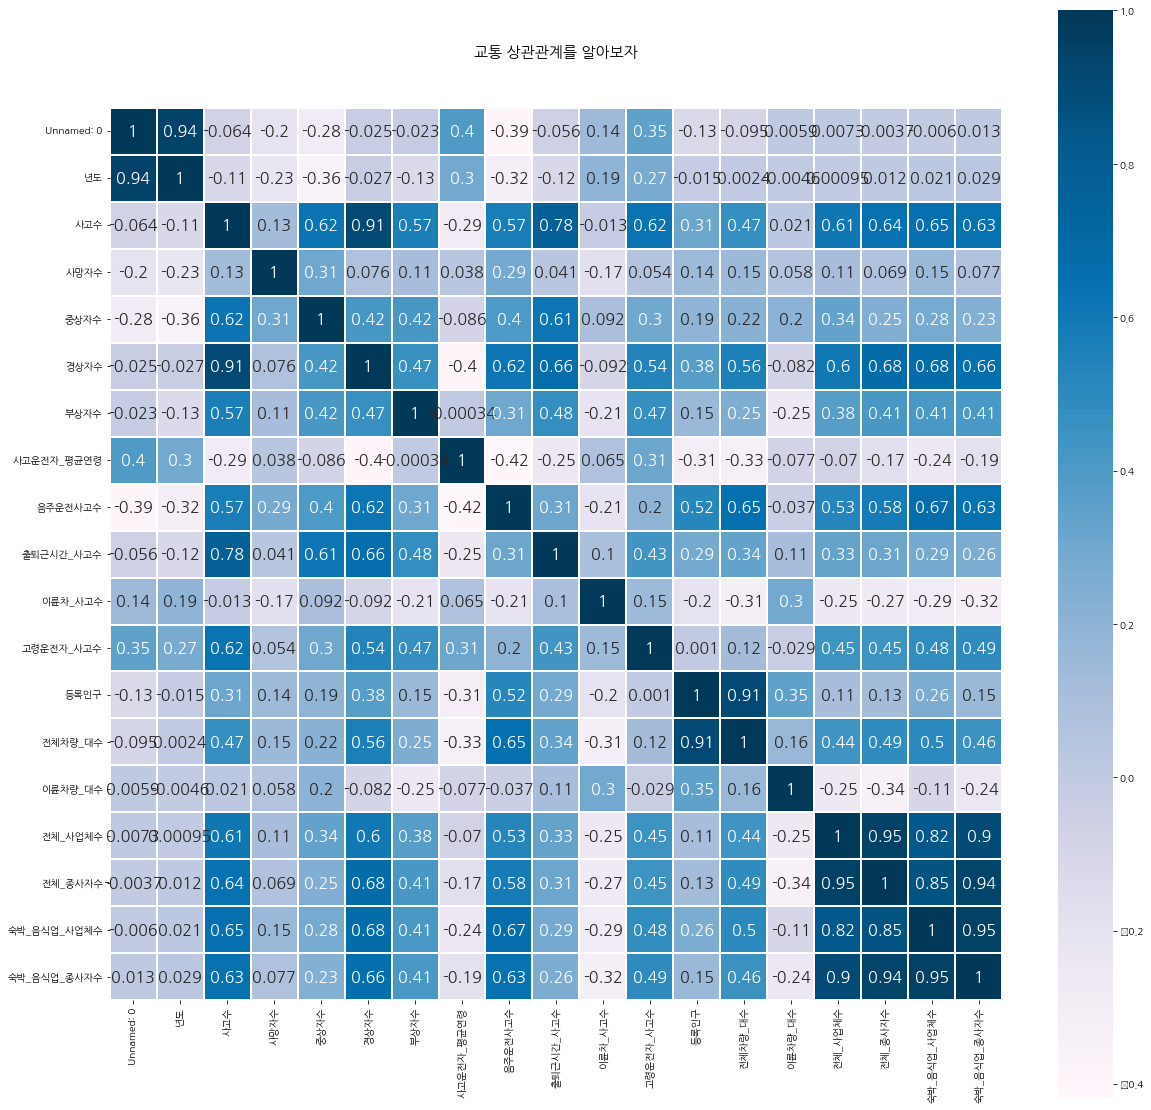

In [20]:
colormap = plt.cm.PuBu

plt.figure(figsize=(20, 20))

plt.title("교통 상관관계를 알아보자", y = 1.05, size = 15)

sns.heatmap(df2.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# 출처: https://hong-yp-ml-records.tistory.com/33 [HONG YP's Data Science BLOG]

In [22]:
import numpy as np

C:\Users\cityo\AppData\Local\Temp/ipykernel_24204/2361611542.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df__, dtype=np.bool)


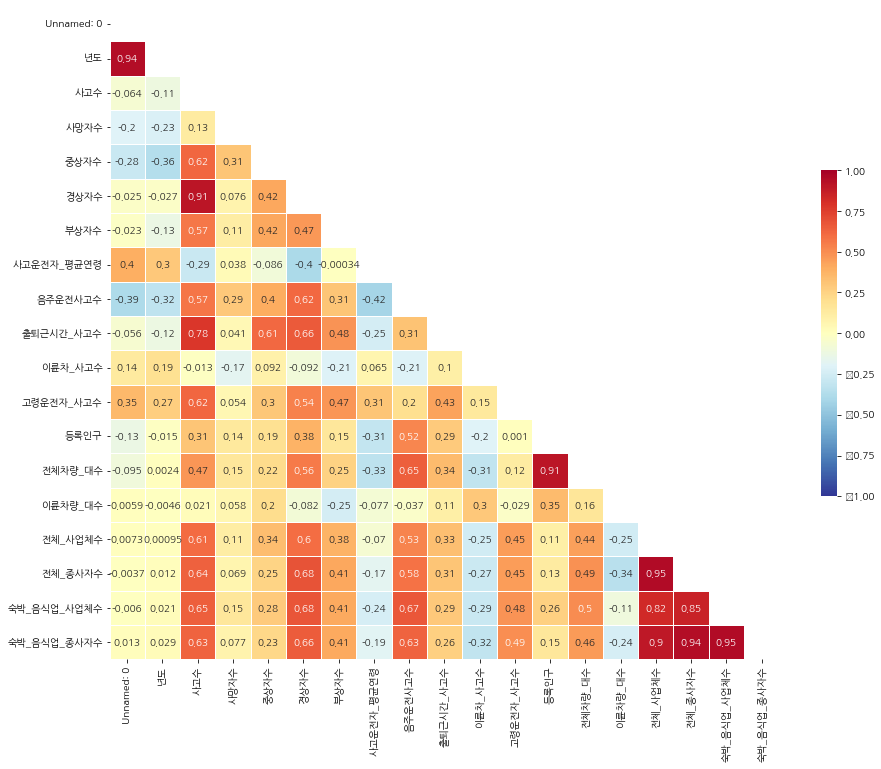

In [25]:
df__ = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df__, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df__, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
# df_store_expense_year = df_card.groupby(['연도',  
#                                     '시도명', 
#                                     '업종명 대분류', 
#                                     '업종명'
#                                    ])[['이용금액']].mean().reset_index()
# df_store_count_year = df_card.groupby(['연도', 
#                                   '시도명', 
#                                   '업종명 대분류', 
#                                   '업종명'
#                                  ])[['매장수']].mean().reset_index()

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='연도', y='매장수', data=df_industry, hue='업종명 대분류')

In [56]:
df_group.columns

Index(['Unnamed: 0', '년도', '사고수', '사망자수', '중상자수', '경상자수', '부상자수', '사고운전자_평균연령',
       '음주운전사고수', '출퇴근시간_사고수', '이륜차_사고수', '고령운전자_사고수', '등록인구', '전체차량_대수',
       '이륜차량_대수', '전체_사업체수', '전체_종사자수', '숙박_음식업_사업체수', '숙박_음식업_종사자수'],
      dtype='object')

In [27]:
df[['년도','자치구','사고수']].sort_values(by='년도',ascending=False)

,년도,자치구,사고수
74,2019,중랑구,267
62,2019,마포구,245
50,2019,강남구,349
51,2019,강동구,205
52,2019,강북구,252
...,...,...,...
21,2017,은평구,204
22,2017,종로구,299
23,2017,중구,330
24,2017,중랑구,325


In [72]:
df2=df.drop(columns='자치구')

In [75]:
df2_list=df2.columns.tolist()

In [77]:
df_all=pd.pivot_table(data=df, 
               index='자치구', 
               values=df2_list,
               aggfunc='sum').reset_index()

In [92]:
list_gu=df_all['자치구']

In [96]:
list_gu

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 자치구, dtype: object

In [85]:
df_all[df_all['자치구']=='강남구']

,자치구,Unnamed: 0,경상자수,고령운전자_사고수,년도,등록인구,부상자수,사고수,사고운전자_평균연령,사망자수,숙박_음식업_사업체수,숙박_음식업_종사자수,음주운전사고수,이륜차_사고수,이륜차량_대수,전체_사업체수,전체_종사자수,전체차량_대수,중상자수,출퇴근시간_사고수
0,강남구,75,1256,157,6054,1658714,142,1059,145.4,6,32841,174705,134,20,50581,214911,2072023,759647,262,198


In [146]:
# list_n=[]

# for i in range(1,25):
    
#     list_n.append(i)
    
# list_n

In [142]:
# a=0

# for i,x in enumerate(list_gu, 1):

#     df_x = df[df['자치구']==i][['자치구','사고수']]

#     df_1

In [202]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [438]:
df_gangnam=df[df['자치구']=='강남구'][:]

In [439]:
df_gangnam

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
0,2017,강남구,350,3,115,407,51,48.9,55,66,6,48,561052,255025,16714,72511,679047,11074,56982
25,2018,강남구,360,2,71,439,49,48.9,43,74,6,64,547453,252122,16795,71373,694136,10730,58366
50,2019,강남구,349,1,76,410,42,47.6,36,58,8,45,550209,252500,17072,71027,698840,11037,59357


## 각 지자체별 사고수 변화 (스크린샷용)

Text(0.5, 1.0, '3년 강남구 사고수 변화')

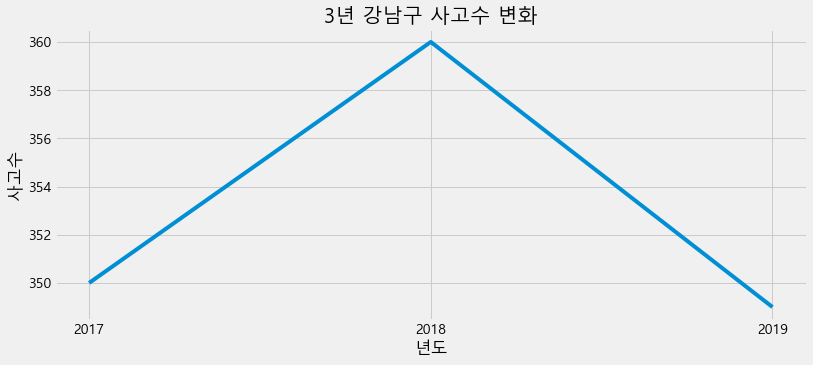

In [441]:
plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_gangnam,  ci=None, palette='Greens_r')
ax.set_title('3년 강남구 사고수 변화')

In [205]:
df_gangseo=df[df['자치구']=='강서구'][:]

In [206]:
df_gangseo

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30,608255,220758,18695,36556,234394,5651,20057
28,2018,강서구,268,2,101,345,33,48.5,31,66,6,33,603611,223157,18542,38524,248204,5900,21475
53,2019,강서구,262,3,77,289,25,51.6,15,60,9,46,598273,223476,18652,39458,257494,6106,22192


Text(0.5, 1.0, '3년 강서구 사고수 변화')

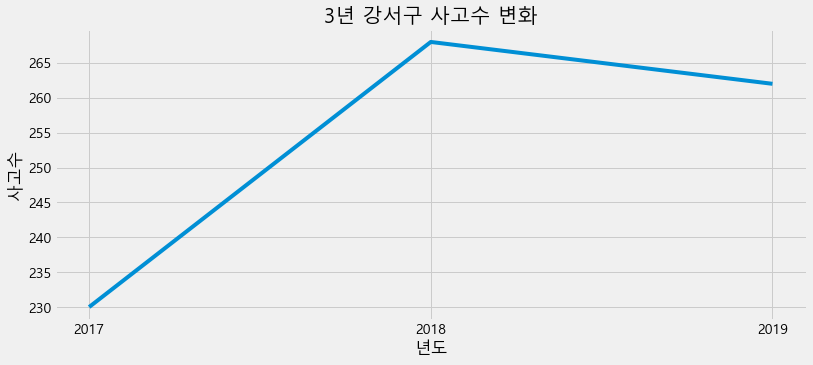

In [436]:
df_gangseo

plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_gangseo,  ci=None, palette='Greens_r')
ax.set_title('3년 강서구 사고수 변화')

In [207]:
df_mapo=df[df['자치구']=='마포구'][:]

In [208]:
df_mapo

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
12,2017,마포구,299,3,74,379,20,47.1,29,59,4,43,385783,133818,17287,36325,247999,8139,28793
37,2018,마포구,283,1,83,330,24,48.4,25,76,2,37,386359,135066,17075,37232,255152,8429,31288
62,2019,마포구,245,1,58,282,45,48.2,20,46,2,34,385925,135135,17228,37290,247276,8616,29425


Text(0.5, 1.0, '3년 마포구 사고수 변화')

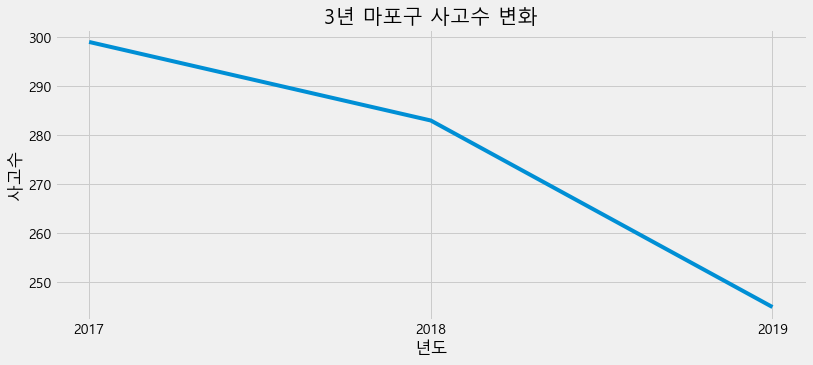

In [435]:
import numpy as np

df_mapo=df[df['자치구']=='마포구'][['년도','자치구','사고수']]

plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_mapo,  ci=None, palette='Greens_r')
ax.set_title('3년 마포구 사고수 변화')

In [212]:
df_yeong=df[df['자치구']=='영등포구'][:]

In [214]:
df_yeong

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
19,2017,영등포구,373,2,105,426,62,49.7,28,86,13,59,402024,162628,16478,43163,362800,7003,25853
44,2018,영등포구,381,5,94,438,49,49.3,30,78,8,53,403600,160301,16361,42589,367557,6897,27163
69,2019,영등포구,325,1,77,348,44,50.8,15,73,11,54,400986,158273,16263,42370,373478,6954,27259


Text(0.5, 1.0, '3년 영등포구 사고수 변화')

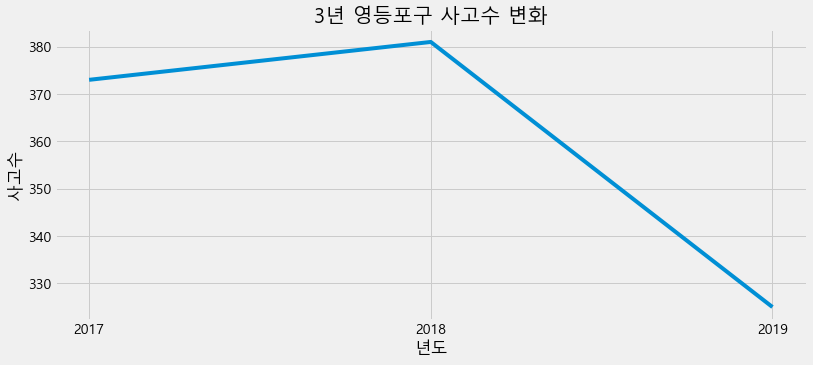

In [434]:
df_yeong=df[df['자치구']=='영등포구'][['년도','자치구','사고수']]

plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_yeong,  ci=None, palette='Greens_r')
ax.set_title('3년 영등포구 사고수 변화')

In [215]:
df_jong=df[df['자치구']=='종로구'][:]

In [216]:
df_jong

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
22,2017,종로구,299,5,99,303,56,51.5,18,59,8,48,164257,64216,13388,40490,268702,6724,26577
47,2018,종로구,269,0,66,270,39,53.1,21,52,7,52,163026,63883,13151,39952,265017,6625,27639
72,2019,종로구,275,2,91,278,51,50.3,16,66,12,53,161869,63321,13269,39679,260446,6709,26606


Text(0.5, 1.0, '3년 종로구 사고수 변화')

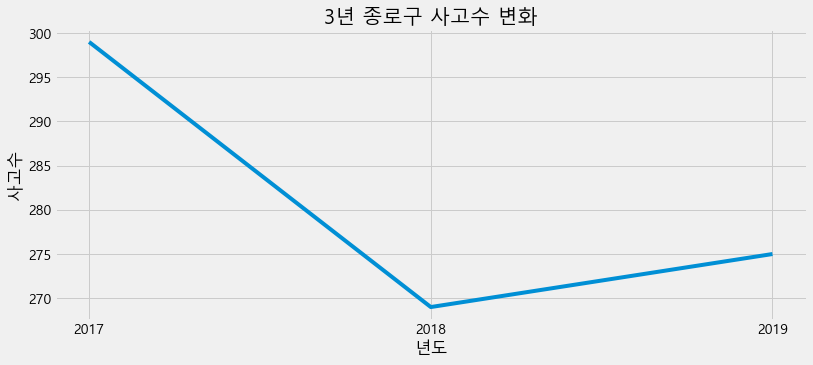

In [433]:
df_jong=df[df['자치구']=='종로구'][['년도','자치구','사고수']]

plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_jong,  ci=None, palette='Greens_r')
ax.set_title('3년 종로구 사고수 변화')

In [159]:
list_gu

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 자치구, dtype: object

In [217]:
df_gdong=df[df['자치구']=='강동구'][:]

In [218]:
df_gdong

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
1,2017,강동구,194,6,65,185,15,50.8,22,50,3,28,440359,153054,16496,29952,146512,4885,15466
26,2018,강동구,226,1,64,216,27,51.5,16,49,5,39,431920,151739,16305,29772,145990,4834,15308
51,2019,강동구,205,2,70,205,21,50.6,10,51,3,29,440390,156231,16668,29080,141770,4879,15636


Text(0.5, 1.0, '3년 강동구 사고수 변화')

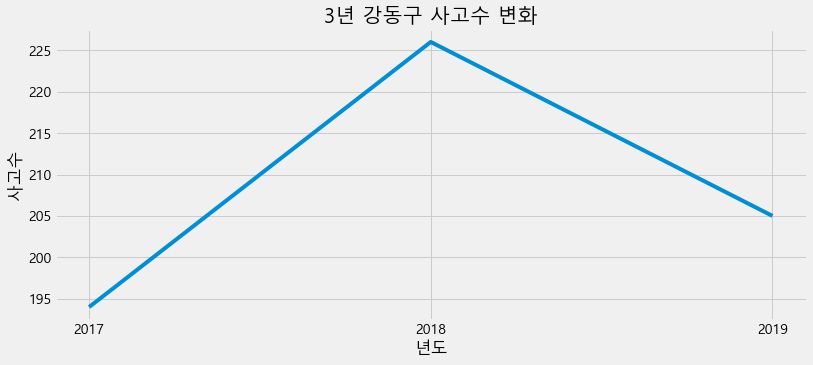

In [432]:
df_gdong=df[df['자치구']=='강동구'][['년도','자치구','사고수']]

plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_gdong,  ci=None, palette='Greens_r')
ax.set_title('3년 강동구 사고수 변화')

In [219]:
df_nowon=df[df['자치구']=='노원구'][:]

In [220]:
df_nowon

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
8,2017,노원구,264,1,67,309,34,48.6,24,77,7,34,558075,169700,14992,26516,117859,4143,14211
33,2018,노원구,251,2,71,303,21,50.8,27,42,4,36,548160,168581,14957,26616,118713,4191,14443
58,2019,노원구,260,2,69,291,23,49.8,14,66,4,49,537303,166980,14905,26618,116684,4278,14520


Text(0.5, 1.0, '3년 노원구 사고수 변화')

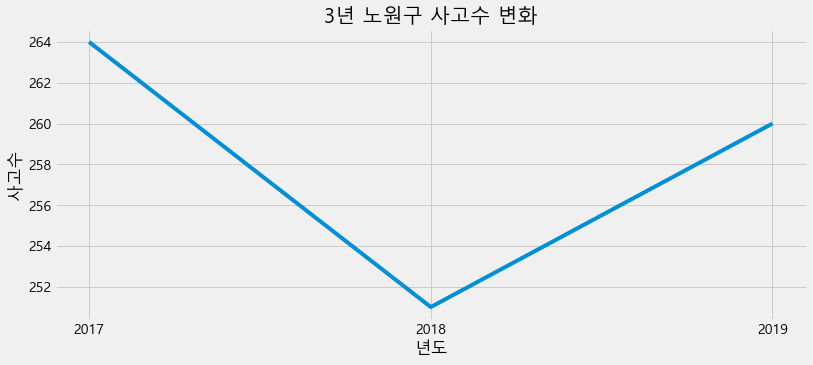

In [430]:
df_nowon=df[df['자치구']=='노원구'][['년도','자치구','사고수']]

plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_nowon,  ci=None, palette='Greens_r')
ax.set_title('3년 노원구 사고수 변화')

In [221]:
df_gbook=df[df['자치구']=='강북구'][:]

In [222]:
df_gbook

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
2,2017,강북구,271,0,88,291,22,47.8,13,76,15,33,328002,99742,21922,18928,71752,3681,10569
27,2018,강북구,258,1,70,297,13,49.7,14,56,10,36,322915,99147,21782,18918,72418,3719,10674
52,2019,강북구,252,1,57,269,14,50.1,10,56,23,48,317695,98254,21890,19014,73904,3779,11090


Text(0.5, 1.0, '3년 강북구 사고수 변화')

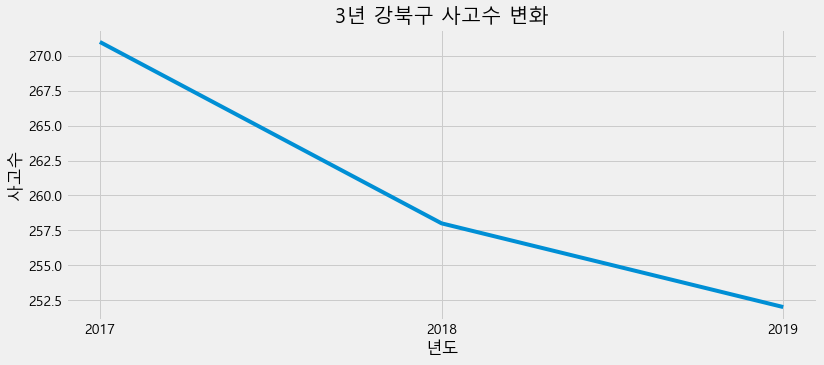

In [431]:
df_gbook=df[df['자치구']=='강북구'][['년도','자치구','사고수']]

plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False, )
plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='사고수', data=df_gbook,  ci=None, palette='Greens_r')
ax.set_title('3년 강북구 사고수 변화')

In [164]:
df

,Unnamed: 0,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
0,0,2017,강남구,350,3,115,407,51,48.9,55,66,6,48,561052,255025,16714,72511,679047,11074,56982
1,1,2017,강동구,194,6,65,185,15,50.8,22,50,3,28,440359,153054,16496,29952,146512,4885,15466
2,2,2017,강북구,271,0,88,291,22,47.8,13,76,15,33,328002,99742,21922,18928,71752,3681,10569
3,3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30,608255,220758,18695,36556,234394,5651,20057
4,4,2017,관악구,258,1,73,247,35,48.7,23,50,15,36,520929,146633,24530,26374,115390,5640,17322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,2019,용산구,235,0,56,255,12,49.8,14,47,10,41,245185,92666,16145,20254,135240,4594,18282
71,71,2019,은평구,199,1,73,191,26,52.5,16,49,5,38,484546,150700,20880,24681,93631,4331,12965
72,72,2019,종로구,275,2,91,278,51,50.3,16,66,12,53,161869,63321,13269,39679,260446,6709,26606
73,73,2019,중구,270,1,79,267,27,51.1,7,57,7,54,136488,66089,14353,60127,392568,6250,34751


In [165]:
df.columns

Index(['Unnamed: 0', '년도', '자치구', '사고수', '사망자수', '중상자수', '경상자수', '부상자수',
       '사고운전자_평균연령', '음주운전사고수', '출퇴근시간_사고수', '이륜차_사고수', '고령운전자_사고수', '등록인구',
       '전체차량_대수', '이륜차량_대수', '전체_사업체수', '전체_종사자수', '숙박_음식업_사업체수',
       '숙박_음식업_종사자수'],
      dtype='object')

In [387]:
df_gangseo=df[df['자치구']=='강서구'][['년도', '자치구', '사고수', '사망자수', '중상자수', '경상자수', '부상자수',
       '사고운전자_평균연령', '음주운전사고수', '출퇴근시간_사고수', '이륜차_사고수', '고령운전자_사고수', '등록인구',
       '전체차량_대수', '이륜차량_대수', '전체_사업체수', '전체_종사자수', '숙박_음식업_사업체수',
       '숙박_음식업_종사자수']]

In [388]:
df_gangseo

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
3,2017,강서구,230,1,72,258,30,48.4,24,64,7,30,608255,220758,18695,36556,234394,5651,20057
28,2018,강서구,268,2,101,345,33,48.5,31,66,6,33,603611,223157,18542,38524,248204,5900,21475
53,2019,강서구,262,3,77,289,25,51.6,15,60,9,46,598273,223476,18652,39458,257494,6106,22192


## 등록인구수 시각화 테스트

Text(0.5, 1.0, '3년 강서구 등록인구수 변화')

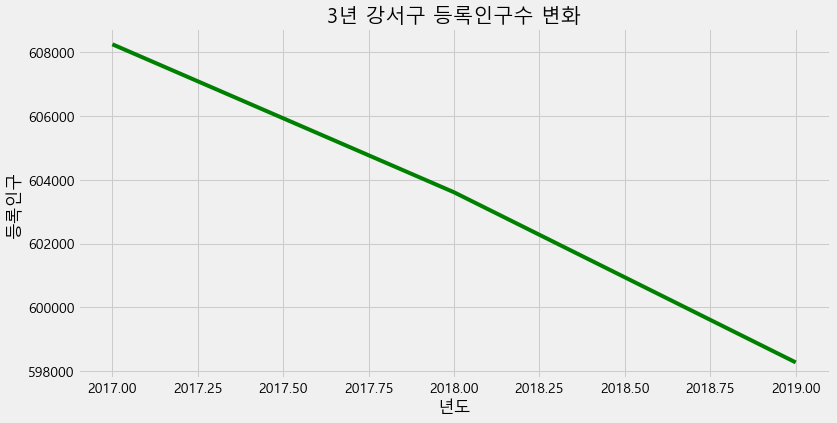

In [427]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', useOffset=False, )
# plt.xticks(np.arange(2017, 2020, step=1))
# plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f원'))
ax = sns.lineplot(x='년도', y='등록인구', data=df_gangseo,  ci=None, color='green')
ax.set_title('3년 강서구 등록인구수 변화')

In [102]:
# a=0

# for i in list_gu:

#     df_a = df[df['자치구']==i][['자치구','사고수']]
#     a+=1
    
    
# df_a
    

,자치구,사고수
24,중랑구,325
49,중랑구,280
74,중랑구,267


In [5]:
df['자치구'].nunique()

25

In [6]:
df['자치구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [ ]:
강서,강북,노원,강동,종로,영등,마포,강서,강남

## 웹서비스 데이터프레임 스크린샷 버전 

In [24]:
df=df.drop(columns='Unnamed: 0')

In [25]:
df_gwang=df[df['자치구']=='광진구'][:]
df_gwan=df[df['자치구']=='관악구'][:]
df_guro=df[df['자치구']=='구로구'][:]
df_gold=df[df['자치구']=='금천구'][:]
df_jung=df[df['자치구']=='중랑구'][:]
df_eun=df[df['자치구']=='은평구'][:]
df_seong=df[df['자치구']=='성북구'][:]
df_yong=df[df['자치구']=='용산구'][:]
df_dong=df[df['자치구']=='동대문구'][:]
df_seo=df[df['자치구']=='서대문구'][:]
df_moving=df[df['자치구']=='동작구'][:]
df_do=df[df['자치구']=='도봉구'][:]
df_sung=df[df['자치구']=='성동구'][:]
df_jjung=df[df['자치구']=='중랑구'][:]
df_yang=df[df['자치구']=='양천구'][:]

In [26]:
df_gwang

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
5,2017,광진구,230,0,80,223,31,48.7,14,58,4,32,372298,117082,18451,24688,125170,4675,16498
30,2018,광진구,258,2,85,250,15,49.4,26,58,7,35,371063,118893,18341,24535,127879,4764,17023
55,2019,광진구,212,0,53,253,11,49.7,13,34,9,36,366972,117576,18277,24445,126305,4786,16639


In [27]:
df_gwan

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
4,2017,관악구,258,1,73,247,35,48.7,23,50,15,36,520929,146633,24530,26374,115390,5640,17322
29,2018,관악구,285,0,91,287,33,48.4,22,66,13,35,520040,145944,24514,26105,113944,5561,17541
54,2019,관악구,286,0,88,252,23,50.3,20,62,17,54,517334,144565,24515,25505,115329,5662,17812


In [28]:
df_guro

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
6,2017,구로구,271,2,90,281,22,49.1,28,47,14,39,441559,160214,16254,38405,213468,4688,14686
31,2018,구로구,282,1,71,325,28,48.9,17,64,11,29,438486,160284,15844,38553,218070,4664,15178
56,2019,구로구,257,2,79,294,22,49.2,17,75,13,44,439371,160128,15663,38756,225668,4726,15112


In [29]:
df_gold

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
7,2017,금천구,205,0,74,240,24,50.3,8,43,8,26,253491,98099,11672,31750,228000,3318,10293
32,2018,금천구,241,0,88,274,22,50.2,20,71,15,31,254021,98604,11541,32472,234012,3350,11033
57,2019,금천구,213,1,67,248,20,50.3,8,60,16,35,251820,99150,11569,33814,242686,3435,10808


In [30]:
df_jung

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
24,2017,중랑구,325,1,109,309,60,50.3,13,95,9,53,412780,138184,24268,28045,102758,4154,10944
49,2018,중랑구,280,2,106,313,32,50.8,18,67,13,48,408147,138292,24270,28024,103016,4152,11212
74,2019,중랑구,267,2,76,256,29,51.3,10,65,18,47,402024,137050,24327,28228,103345,4171,11311


In [31]:
df_eun

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
21,2017,은평구,204,4,67,231,39,49.7,14,46,2,25,491202,149893,20889,24561,88818,4178,11781
46,2018,은평구,213,2,81,217,32,51.3,11,50,7,41,487666,150558,20911,24873,90049,4273,12317
71,2019,은평구,199,1,73,191,26,52.5,16,49,5,38,484546,150700,20880,24681,93631,4331,12965


In [32]:
df_seong

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
16,2017,성북구,324,2,109,341,19,48.4,16,77,8,37,455407,143512,26303,24039,108991,4415,12731
41,2018,성북구,280,2,87,299,22,50.6,19,66,10,44,447687,142814,26271,23287,108201,4463,13397
66,2019,성북구,294,0,74,320,28,49.2,14,77,14,39,454744,145865,26544,23617,111005,4461,13323


In [33]:
df_yong

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
20,2017,용산구,242,0,65,258,24,49.3,17,51,8,36,244444,93582,16124,20806,133260,4453,18201
45,2018,용산구,230,3,68,212,21,50.6,18,52,7,43,245090,93531,16016,20813,141216,4603,19474
70,2019,용산구,235,0,56,255,12,49.8,14,47,10,41,245185,92666,16145,20254,135240,4594,18282


In [34]:
df_dong

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
10,2017,동대문구,295,4,115,247,19,50.3,13,70,11,40,366011,121652,24145,32411,142842,4909,14047
35,2018,동대문구,242,3,105,221,12,49.6,13,49,13,28,364338,122090,23766,31878,140748,4863,14447
60,2019,동대문구,210,3,61,210,15,52.5,8,51,12,44,363023,121637,23727,31324,138400,4845,14420


In [35]:
df_seo

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
13,2017,서대문구,181,0,56,175,32,50.9,7,40,6,33,325028,100963,14895,19852,111117,4337,14107
38,2018,서대문구,223,1,82,201,39,51.1,9,49,10,37,323080,101649,14896,19796,109490,4315,14505
63,2019,서대문구,239,3,78,290,66,50.9,9,53,3,47,323171,101909,14805,20095,113819,4321,14232


In [36]:
df_moving

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
11,2017,동작구,312,4,95,298,42,47.9,22,66,10,35,408493,119896,15059,19966,110422,4143,12907
36,2018,동작구,288,2,71,273,55,49.3,15,83,11,40,409385,120438,14962,19916,112564,4141,13130
61,2019,동작구,293,0,94,316,49,50.7,11,67,17,62,408912,120628,15156,19793,106159,4153,13252


In [37]:
df_do

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
9,2017,도봉구,237,1,79,235,39,48.8,24,60,5,33,346234,112000,14677,18351,70503,2732,7514
34,2018,도봉구,208,2,72,182,36,51.3,14,50,7,36,341649,112050,14742,18894,74314,2751,7906
59,2019,도봉구,203,1,63,200,36,49.4,12,50,12,22,335631,111283,14848,18628,72939,2814,8203


In [38]:
df_sung

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
15,2017,성동구,210,1,70,187,40,49.1,15,44,7,33,312711,123811,20695,27278,167308,3786,11744
40,2018,성동구,202,2,56,204,8,50.2,16,47,6,35,316463,126712,20618,27868,174819,3836,12442
65,2019,성동구,185,1,47,204,14,48.0,6,45,7,24,308979,126428,20165,28343,178243,3935,12957


In [39]:
df_jjung

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
24,2017,중랑구,325,1,109,309,60,50.3,13,95,9,53,412780,138184,24268,28045,102758,4154,10944
49,2018,중랑구,280,2,106,313,32,50.8,18,67,13,48,408147,138292,24270,28024,103016,4152,11212
74,2019,중랑구,267,2,76,256,29,51.3,10,65,18,47,402024,137050,24327,28228,103345,4171,11311


In [40]:
df_yang

,년도,자치구,사고수,사망자수,중상자수,경상자수,부상자수,사고운전자_평균연령,음주운전사고수,출퇴근시간_사고수,이륜차_사고수,고령운전자_사고수,등록인구,전체차량_대수,이륜차량_대수,전체_사업체수,전체_종사자수,숙박_음식업_사업체수,숙박_음식업_종사자수
18,2017,양천구,267,3,85,285,23,49.1,30,67,9,31,475018,169441,18618,26077,119943,3566,11585
43,2018,양천구,225,0,64,218,30,50.8,9,51,2,36,468145,169140,18608,26126,123311,3604,12092
68,2019,양천구,237,0,55,264,31,49.9,11,61,6,40,462285,168528,18844,25894,121582,3618,12352


In [43]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3C26-45E0

 C:\Users\cityo\Desktop\Git_Space 디렉터리

2021-10-03  오후 01:16    <DIR>          .
2021-10-03  오후 01:16    <DIR>          ..
2021-10-03  오후 01:07    <DIR>          .ipynb_checkpoints
2021-10-03  오후 01:16         1,044,968 1002.ipynb
2021-10-03  오후 12:49    <DIR>          2jo
2021-10-03  오후 12:48    <DIR>          Algorithm
2021-10-03  오후 12:49    <DIR>          data-engineer-1
2021-10-03  오후 12:49    <DIR>          finalPJT
2021-10-03  오후 12:48    <DIR>          first-edition
2021-10-03  오후 12:49    <DIR>          github-profile-readme-generator
2021-10-03  오후 12:49    <DIR>          HayeonKimm
2021-10-03  오후 12:49    <DIR>          Hayeonkimm.github.io
2021-10-03  오후 12:49    <DIR>          jiyeoon
2021-10-03  오후 01:14    <DIR>          jupyter
2021-10-03  오후 12:48    <DIR>          jupyter_filizila
2021-10-03  오후 12:48    <DIR>          kaggle
2021-10-03  오후 12:48    <DIR>          Kaggle_competition
2021-10-03  오후 12:48    <DIR>          m

# 교통사고 세부 데이터 분석

## 강남구

In [45]:
df__gang=pd.read_csv('../25개자치구_사고다발데이터/교통사고_강남구.csv')

In [48]:
df__gang.head()
# df__gang.shape

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,기상상태,일광상태,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구
0,2017,3,2,목요일,11,경상사고,0,0,1,0,...,맑음,주간,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
1,2017,3,5,일요일,12,경상사고,0,0,2,0,...,맑음,주간,차대차,측면직각충돌,안전거리미확보,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
2,2017,3,27,월요일,23,경상사고,0,0,1,0,...,맑음,심야,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
3,2017,4,21,금요일,1,중상사고,0,2,0,0,...,맑음,심야,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
4,2017,4,30,일요일,8,경상사고,0,0,1,0,...,맑음,출퇴근,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구


In [78]:
df__gang.columns

Index(['년도', '월', '일', '요일', '시각', '사고등급', '사망자수', '중상자수', '경상자수', '부상자수',
       '연령', '성별', '경력', '음주', '종별', '용도', '관련자2', '사고형태', '기상상태', '일광상태',
       '사고유형1', '사고유형2', '법규위반', '도로종류', '지점명', '위도', '경도', '자치구'],
      dtype='object')

In [208]:
df_wol=df__gang['월'].value_counts()

In [203]:
df_wol=df_wol.columns.drop('월')

In [210]:
df_wol=df__gang['월'].value_counts().sort_index()

In [211]:
# df_wol=pd.DataFrame(df_wol,columns=['월','사고수'])

In [222]:
colors=['red','yellow','green','blue','pink']

<AxesSubplot:>

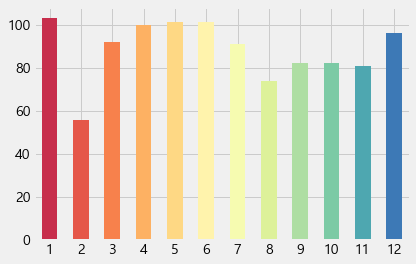

In [428]:
df_wol.plot.bar(rot=0,color=colors)

Text(0, 0.5, '사고수')

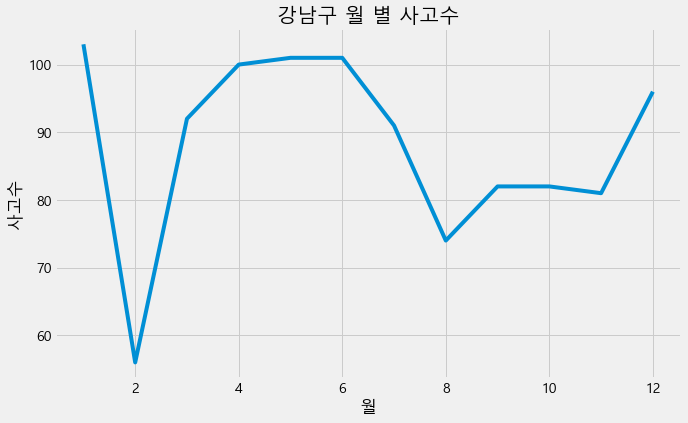

In [429]:
plt.figure(figsize=(10,6))
df_wol.plot.line()
plt.title("강남구 월 별 사고수")
plt.xlabel("월")
plt.ylabel("사고수")

In [255]:
df['년도'].count()

75

In [264]:
df__gang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      1059 non-null   object 
 1   월       1059 non-null   int64  
 2   일       1059 non-null   int64  
 3   요일      1059 non-null   object 
 4   시각      1059 non-null   int64  
 5   사고등급    1059 non-null   object 
 6   사망자수    1059 non-null   int64  
 7   중상자수    1059 non-null   int64  
 8   경상자수    1059 non-null   int64  
 9   부상자수    1059 non-null   int64  
 10  연령      1059 non-null   object 
 11  성별      1059 non-null   object 
 12  경력      1059 non-null   object 
 13  음주      134 non-null    float64
 14  종별      1059 non-null   object 
 15  용도      1059 non-null   object 
 16  관련자2    1059 non-null   object 
 17  사고형태    1059 non-null   object 
 18  기상상태    1059 non-null   object 
 19  일광상태    1059 non-null   object 
 20  사고유형1   1059 non-null   object 
 21  사고유형2   1059 non-null   object 
 22  

In [265]:
df__gang['년도']=df__gang['년도'].astype(int)

In [452]:
df__gang.head()

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,기상상태,일광상태,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구
0,2017,3,2,목요일,11,경상사고,0,0,1,0,...,맑음,주간,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
1,2017,3,5,일요일,12,경상사고,0,0,2,0,...,맑음,주간,차대차,측면직각충돌,안전거리미확보,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
2,2017,3,27,월요일,23,경상사고,0,0,1,0,...,맑음,심야,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
3,2017,4,21,금요일,1,중상사고,0,2,0,0,...,맑음,심야,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
4,2017,4,30,일요일,8,경상사고,0,0,1,0,...,맑음,출퇴근,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구


Text(0, 0.5, '사고유형1')

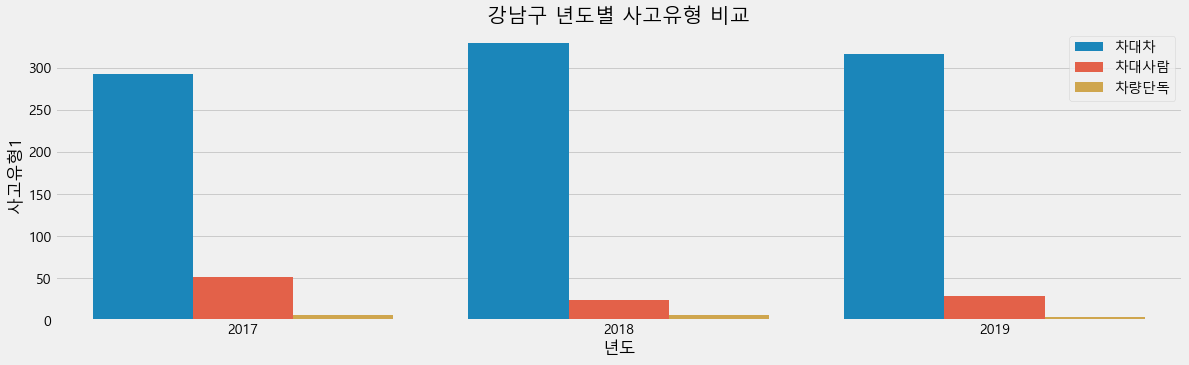

In [472]:
plt.figure(figsize=[18,5])
sns.countplot(data=df__gang, x='년도', hue='사고유형1')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1))
plt.title('강남구 년도별 사고유형 비교')
plt.xlabel('년도')
plt.ylabel('사고유형1')

## 이 부분 웹서비스 생각 중.

Text(0, 0.5, '사고유형2')

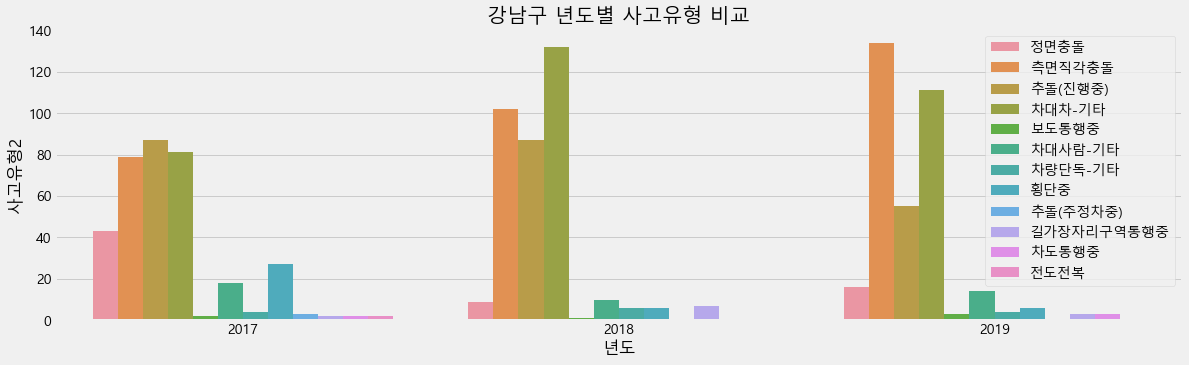

In [468]:
plt.figure(figsize=[18,5])
sns.countplot(data=df__gang, x='년도', hue='사고유형2')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1))
plt.title('강남구 년도별 사고유형 비교')
plt.xlabel('년도')
plt.ylabel('사고유형2')

## 강남구 교통 다발지점 TOP10

<AxesSubplot:title={'center':'강남구 3년간 교통 다발지점 TOP10'}>

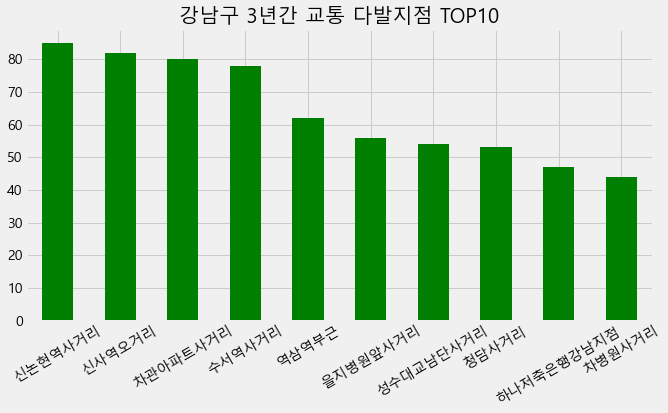

In [426]:
plt.figure(figsize=(10,5))
plt.title('강남구 3년간 교통 다발지점 TOP10')
df__gang['지점명'].value_counts().head(10).plot.bar(rot=30,color='green')

## 년도종합 월별 사망자,중상자,경상자,부상자 데이터

In [296]:
df_gang_gr = df__gang.groupby(['년도',  
                                    '월'])[['사망자수','중상자수','경상자수','부상자수']].mean().reset_index()

In [341]:
df_month=df_gang_gr.groupby(['월']).sum().reset_index()

In [346]:
df_month
# df_month.columns

,월,년도,사망자수,중상자수,경상자수,부상자수
0,1,6054,0.032258,0.641167,3.551767,0.305684
1,2,6054,0.052632,0.726545,3.216901,0.356979
2,3,6054,0.000000,0.723620,3.537885,0.278925
3,4,6054,0.000000,0.727395,3.726271,0.279127
4,5,6054,0.032258,0.875931,3.340778,0.566584
5,6,6054,0.000000,0.842770,3.961999,0.519599
6,7,6054,0.000000,0.588624,3.919312,0.248677
7,8,6054,0.047619,0.779919,3.305684,0.429479
8,9,6054,0.031250,0.964070,2.920139,0.534370
9,10,6054,0.000000,0.719090,3.438831,0.377361


## 라인

<AxesSubplot:xlabel='월', ylabel='사망자수'>

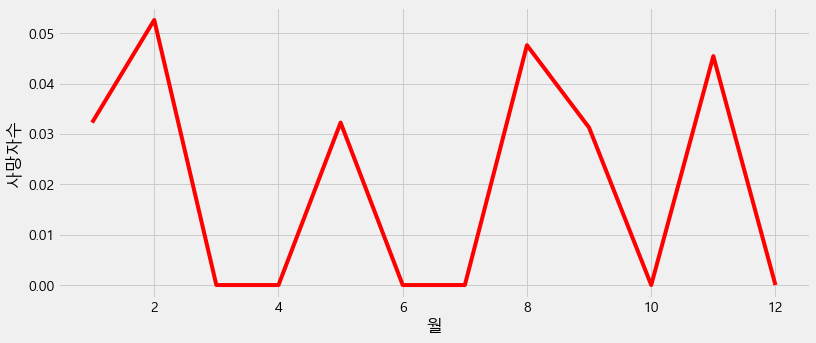

In [491]:
plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain', useOffset=False)
sns.lineplot(x='월', 
             y='사망자수', 
             data=df_month,
             color='red',
#              hue='월', 
             ci=None)

## 이 부분을 서비스에 두려고 생각 중 2

<AxesSubplot:>

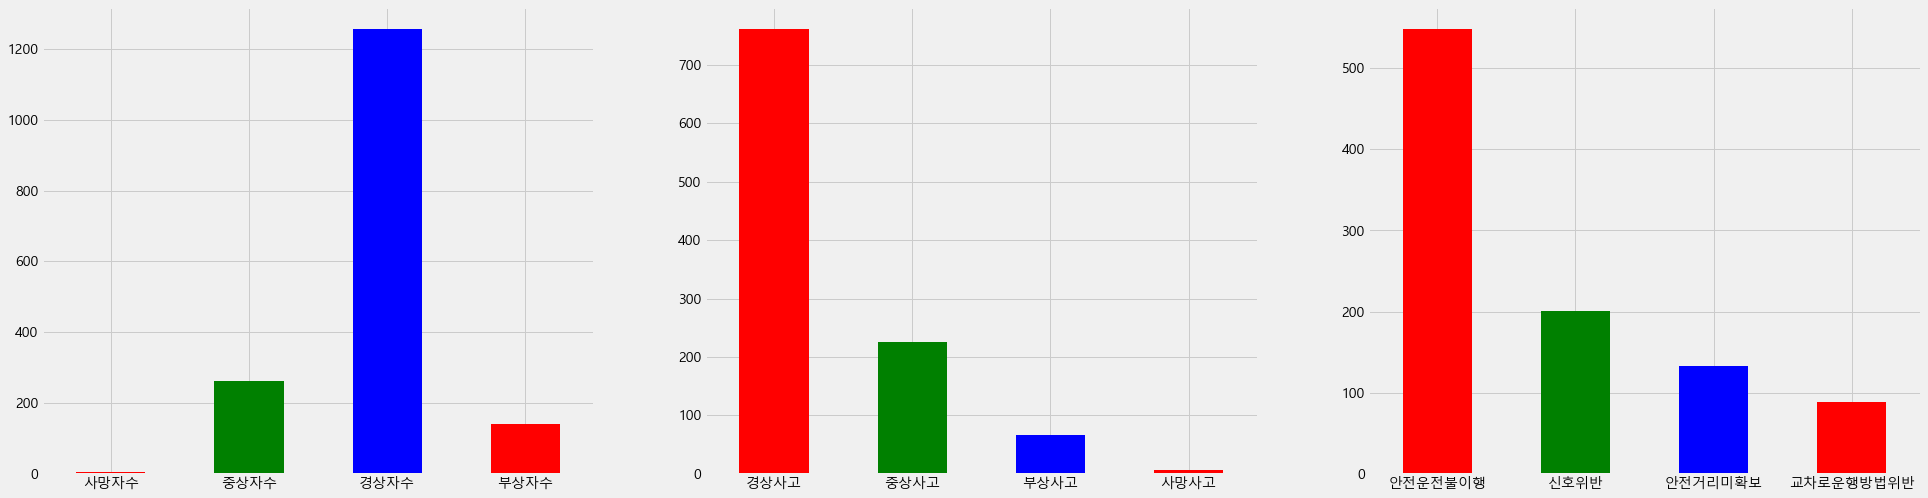

In [453]:
plt.figure(figsize=(30,8))
# fig,ax = plt.subplots(3,3)
colors=['red','green','blue','red','purple']


plt.subplot(1,3,1)
df__gang[['사망자수','중상자수','경상자수','부상자수']].sum().plot.bar(rot=0,color=colors)
plt.subplot(1,3,2)
df__gang['사고등급'].value_counts().plot.bar(rot=0,color=colors)
plt.subplot(1,3,3)
df__gang['법규위반'].value_counts().head(4).plot.bar(rot=0,color=colors)

## 이 부분도 3

<AxesSubplot:title={'center':'강남구 3년간 부상자수 변화'}, xlabel='년도', ylabel='부상자수'>

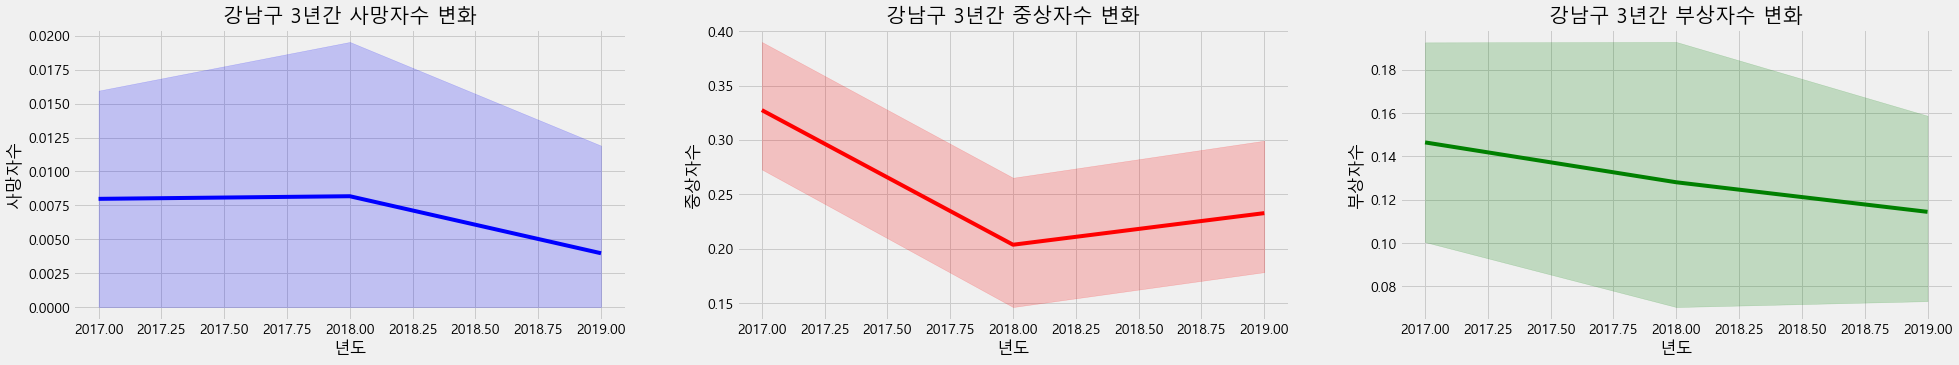

In [400]:
plt.figure(figsize=(30,5))


plt.subplot(1,3,1)
plt.title("강남구 3년간 사망자수 변화")
sns.lineplot(x='년도', y='사망자수', data=df_gang_gr,color='blue')

# plt.figure(figsize=(12,5))
plt.subplot(1,3,2)
plt.title("강남구 3년간 중상자수 변화")
sns.lineplot(x='년도', y='중상자수', data=df_gang_gr, color='red')

# plt.figure(figsize=(12,5))
plt.subplot(1,3,3)
plt.title("강남구 3년간 부상자수 변화")
sns.lineplot(x='년도', y='부상자수', data=df_gang_gr,color='green')

## ..??

<AxesSubplot:xlabel='년도', ylabel='사망자수'>

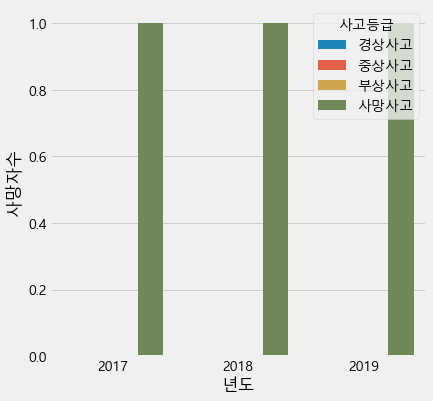

In [422]:
plt.figure(figsize=(6,6))
sns.barplot(x='년도', y='사망자수', data=df__gang, hue='사고등급', ci=None)

In [236]:
df_wol

1     103
2      56
3      92
4     100
5     101
6     101
7      91
8      74
9      82
10     82
11     81
12     96
Name: 월, dtype: int64

In [329]:
# plt.figure(figsize=(10,10))
# ax=df_wol.plot.pie()
# ax.set_title('월별 사고수')

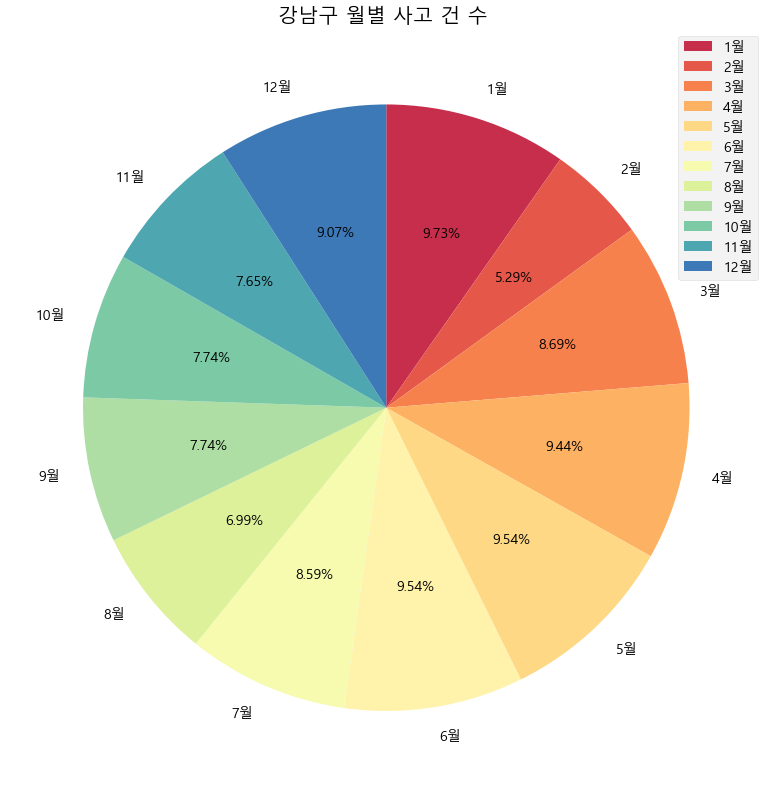

In [421]:
# 1     103
# 2      56
# 3      92
# 4     100
# 5     101
# 6     101
# 7      91
# 8      74
# 9      82
# 10     82
# 11     81
# 12     96




labels = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'] ## 라벨
frequency = [103,56,92,100,101,101,91,74,82,82,81,96] ## 빈도
 
colors = sns.color_palette('Spectral',len(labels)) ## 라벨의 개수 만큼 색상 리스트 생성 
 
fig = plt.figure(figsize=(13,13)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
ax.set_title('강남구 월별 사고 건 수 ')

pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors, ## 색상 지정,
             labels=labels
       )
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

In [ ]:
# 8]:
# plt.figure(figsize=(12,8))
# ax = df_casino.groupby('이용자 구분')['이용금액'].sum().plot.pie(figsize=(12,8))
# ax.set_title('이용자 구분에 따른 이용금액 합계')

In [483]:
# colors=['red','green','blue','red','green','blue','red','green','blue','red','green','blue']

# # 출처: https://ehclub.net/676 [빅데이터 소스]
# # errors = [2,4,3]
# plt.bar(df_wol['월'],df_wol['사고수'],color=colors)
# plt.xlabel("월")
# plt.ylabel("사고수")
# plt.title("set yerr")
# plt.show()

## 월 별 사고수

Text(0.5, 1.0, '강남구 3년 월 별 사고수')

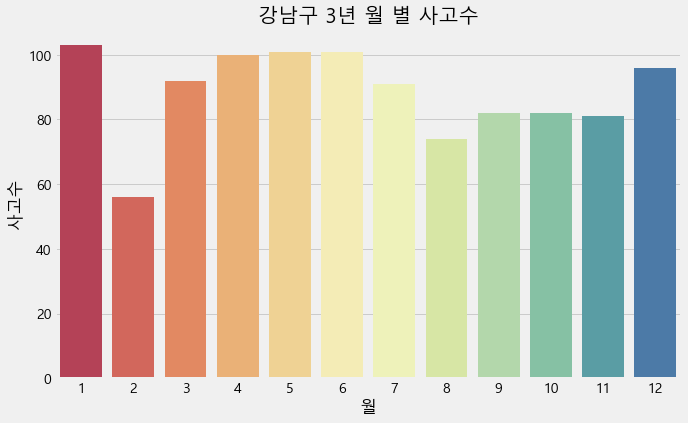

In [473]:
df_wol2 = pd.DataFrame({'월': df_wol.index, '사고수': df_wol.values})

plt.figure(figsize=(10,6))
ax=sns.barplot(x= "월",y='사고수', data=df_wol2, palette="Spectral")
ax.set_title('강남구 3년 월 별 사고수')

## palette 다른 버전

Text(0.5, 1.0, '강남구 3년 월 별 사고수')

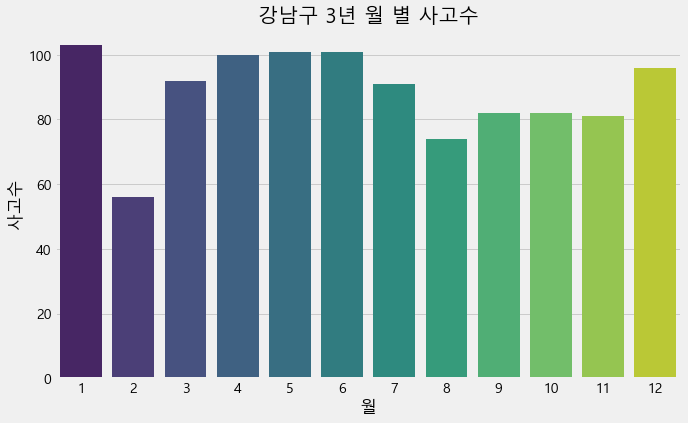

In [474]:
# viridis

df_wol2 = pd.DataFrame({'월': df_wol.index, '사고수': df_wol.values})

plt.figure(figsize=(10,6))
ax=sns.barplot(x= "월",y='사고수', data=df_wol2, palette="viridis")
ax.set_title('강남구 3년 월 별 사고수')

In [105]:
# ax = sns.barplot(x='월', 
# #                  y='결제건수', 
#                  data=df_wol, 
#                  palette='Spectral',
#                  ci=None)
# ax.set_title('분기별 결제건수 합계')

In [107]:
df__gang.head()

,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,...,기상상태,일광상태,사고유형1,사고유형2,법규위반,도로종류,지점명,위도,경도,자치구
0,2017,3,2,목요일,11,경상사고,0,0,1,0,...,맑음,주간,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
1,2017,3,5,일요일,12,경상사고,0,0,2,0,...,맑음,주간,차대차,측면직각충돌,안전거리미확보,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
2,2017,3,27,월요일,23,경상사고,0,0,1,0,...,맑음,심야,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
3,2017,4,21,금요일,1,중상사고,0,2,0,0,...,맑음,심야,차대차,정면충돌,신호위반,특별광역시도,구역삼세무서,37.498266,127.030105,강남구
4,2017,4,30,일요일,8,경상사고,0,0,1,0,...,맑음,출퇴근,차대차,정면충돌,안전운전불이행,특별광역시도,구역삼세무서,37.498266,127.030105,강남구


## 강남구 사망자,중상자,경상자,부상자 시각화
## 강남구 경상,중상,부상 ''
## 법규위반 ''

<AxesSubplot:>

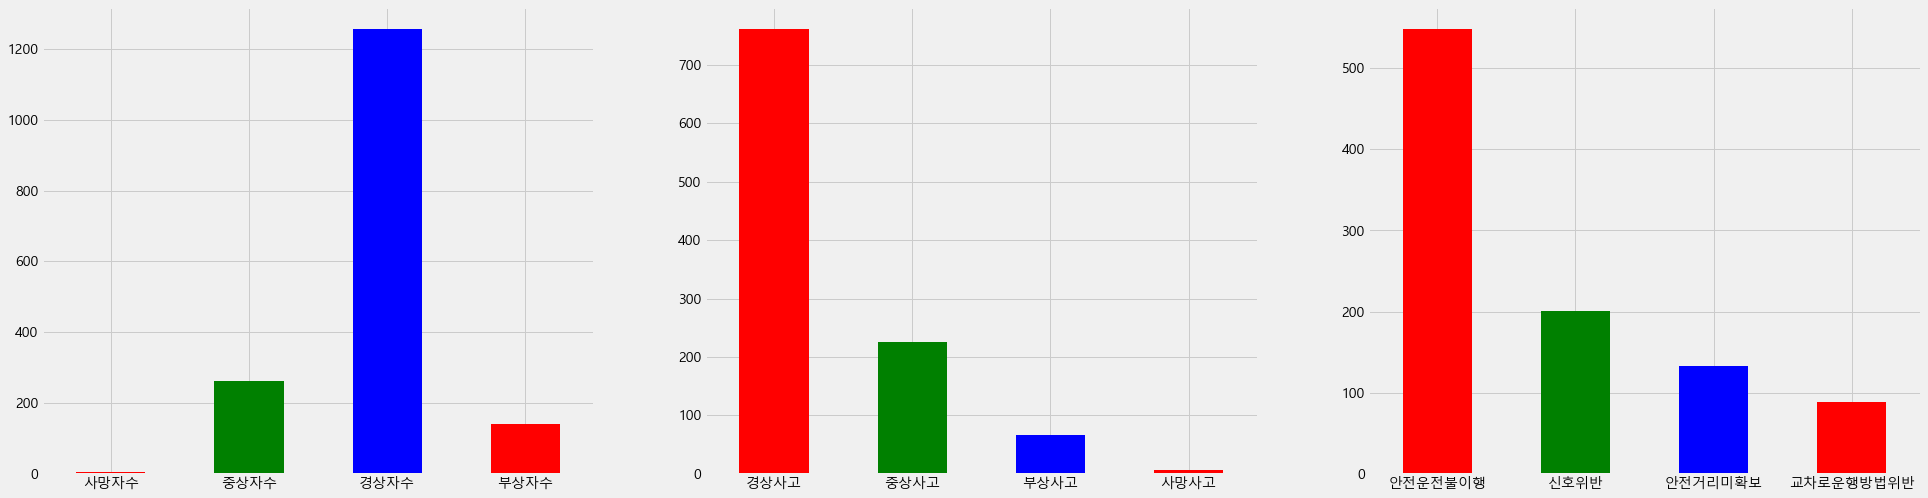

In [475]:
plt.figure(figsize=(30,8))
# fig,ax = plt.subplots(3,3)
colors=['red','green','blue','red','purple']


plt.subplot(1,3,1)
df__gang[['사망자수','중상자수','경상자수','부상자수']].sum().plot.bar(rot=0,color=colors)
plt.subplot(1,3,2)
df__gang['사고등급'].value_counts().plot.bar(rot=0,color=colors)
plt.subplot(1,3,3)
df__gang['법규위반'].value_counts().head(4).plot.bar(rot=0,color=colors)

In [ ]:
df__gang[['사망자수','중상자수','경상자수','부상자수']].sum().plot.bar()

## 강남구 개별 그래프

<AxesSubplot:>

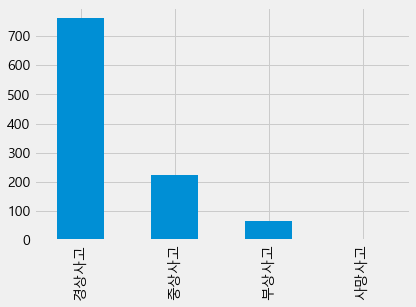

In [477]:
df__gang['사고등급'].value_counts().plot.bar()

<AxesSubplot:>

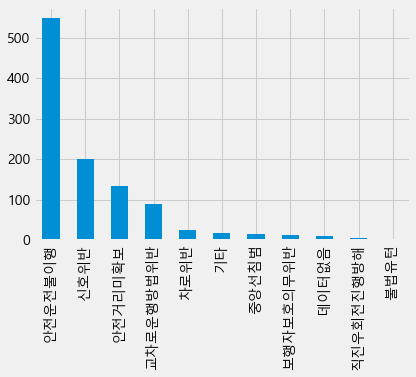

In [478]:
df__gang['법규위반'].value_counts().plot.bar()

<AxesSubplot:>

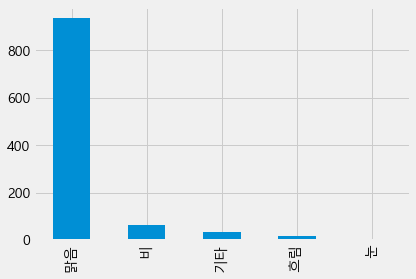

In [479]:
df__gang['기상상태'].value_counts().plot.bar()

<AxesSubplot:>

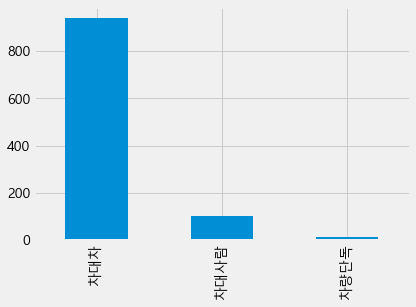

In [480]:
df__gang['사고유형1'].value_counts().plot.bar()

<AxesSubplot:>

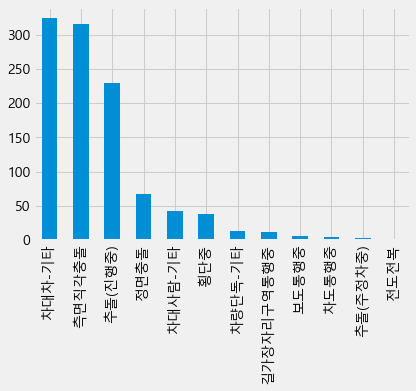

In [481]:
df__gang['사고유형2'].value_counts().plot.bar()

In [ ]:
# ax = sns.barplot(x='분기', 
#                  y='결제건수', 
#                  data=df_casino_quarter, 
#                  palette='Spectral',
#                  ci=None)
# ax.set_title('분기별 결제건수 합계')

# 정해진다면 반복 작업만 남았음.